In [1]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.spatial import ConvexHull

my_dpi=200

In [2]:
origin=load_data('iris')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종


===== 데이터 크기 확인 =====
데이터셋 크기 : (150, 5)
행 개수 : 150개
열 개수 : 5개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df=origin.drop('Species', axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
klist=list(range(2,11))
inertia=[]

for k in klist:
    estimator=KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df)
    inertia.append(estimator.inertia_)

inertia

[152.34795176035792,
 78.85566582597731,
 57.228473214285714,
 49.82774055829229,
 42.42154575309748,
 34.420191786283894,
 30.064593073593073,
 28.715856536394462,
 27.462118791296422]

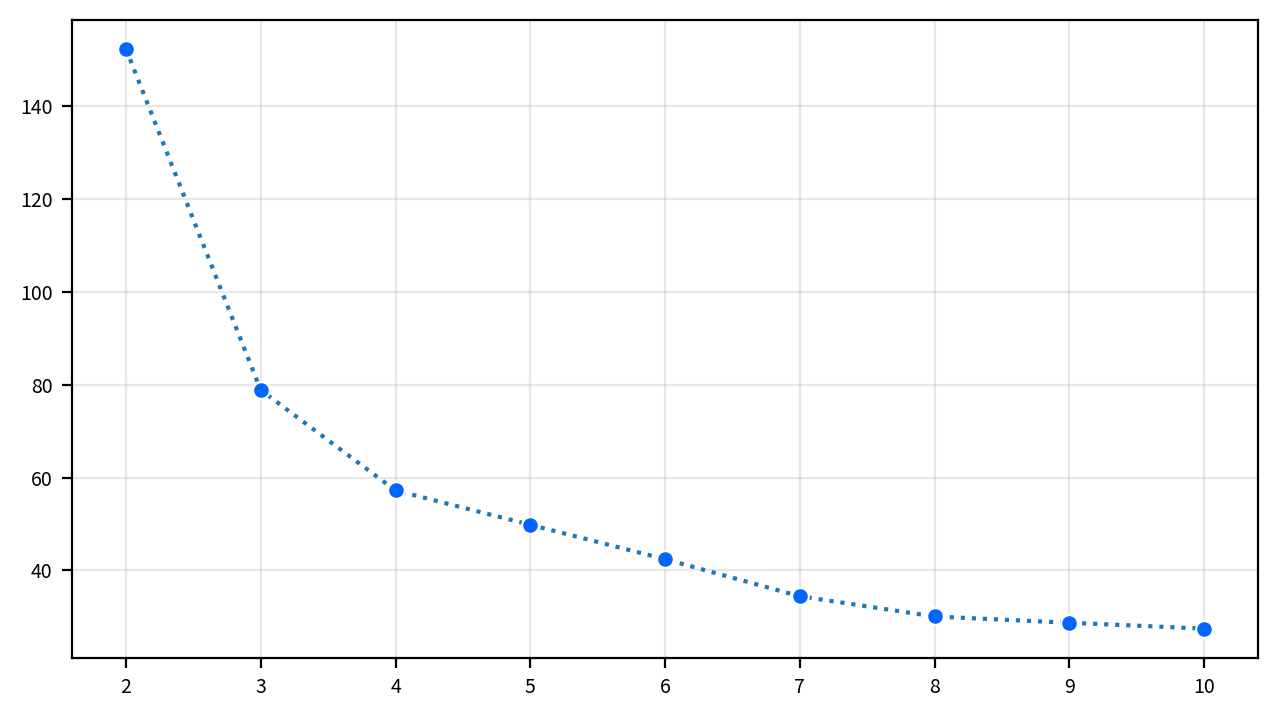

In [5]:
figsize=(1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=klist, y=inertia, linestyle=':', marker='o', markerfacecolor='#0066ff', markeredgecolor='#ffffff')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()